# Heart Disease
## Análise exploratória dos dados de pacientes com doença cardíaca

Conjunto de dados: [Heart Disease Dataset](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset)

O objetivo deste notebook é explorar os dados, criar visualizações que facilitem o entendimento e analisar as informações do conjunto de dados com a finalidade de um melhor entendimento sobre as variáveis apresentadas como material para a criação de um modelo de predição de pacientes com doenças cardiovasculares.

Sumário:

1. [Descrição dos dados](#1.-Descrição-dos-dados)
2. [Perguntas de partida e hipoteses](#2.-Perguntas-de-Partida-e-Hipóteses)
3. [Insights](#3.-Insights)

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown, Latex, HTML
dicionario = pd.read_csv('../data/external/dicionario.csv')
palette = ["lightgreen", "yellow", "orange", "lightblue"]
sns.set_palette(palette)

## 1. Descrição dos dados

### 1.1 Cabeçalho / Exemplos de dados

In [2]:
df = pd.read_csv("../data/raw/dataset.csv")
display(df.head())
display(Markdown("---"))

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


---

### 1.2 Variáveis

In [3]:
display(df.columns)
display(Markdown("---"))

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

---

### 1.3 Informações gerais do conjunto de dados

In [4]:
display(Markdown("- Quantidade de Instâncias: " + str(df.shape[0])))
display(Markdown("\n- Quantidade de Atributos: " + str(df.shape[1])))
display(Markdown("\n- Variaveis e Seus Tipos:"))
display(df.dtypes)
display(Markdown("---\n- Quantidade de Valores Faltantes:"))
display(df.isnull().sum())
display(Markdown("---\n- Estatísticas descritivas:"))
display(df.describe().T)

- Quantidade de Instâncias: 1190


- Quantidade de Atributos: 12


- Variaveis e Seus Tipos:

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

---
- Quantidade de Valores Faltantes:

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

---
- Estatísticas descritivas:

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


---

### 1.4 Dicionário

In [5]:
display(dicionario)

,variavel,descrição,tipo,subtipo
0,age,idade do indivíduo observado,quantitativa,discreta
1,sex,"sexo do indivíduo observado, 1 = masculino, 0 ...",qualitativa,nominal
2,chest pain type,"tipo de dor no peito, \n ...",qualitativa,nominal
3,resting bp s,"pressão arterial em repouso, medido em mm Hg (...",quantitativa,discreta
4,cholesterol,"nível de colesterol no sangue, medido em mg/dl...",quantitativa,discreta
5,fasting blood sugar,"quantidade de açúcar no sangue, 1 = se for mai...",qualitativa,nominal
6,resting ecg,resultado do eletrocardiograma em repouso\n ...,qualitativa,nominal
7,max heart rate,frequencia cardíaca máxima alcançada,quantitativa,discreta
8,exercise angina,"angina induzida por exercício, 1 = sim, 0 = não",qualitativa,nominal
9,oldpeak,medida da elevação/depressão do segmento ST,quantitativa,continua


---
### Atributos categóricos do Conjunto de Dados sobre Doenças Cardíacas

1. **Sexo (Sex)**
   - `0` --> feminino 
   - `1` --> masculino
---
2. **Tipo de Dor no Peito (Chest Pain Type)**
   - `1` --> angina típica
   - `2` --> angina atípica
   - `3` --> dor não anginosa
   - `4` --> assintomática
   
---
3. **Açúcar no Sangue em Jejum (Fasting Blood Sugar)**
   - Indica se o nível de açúcar no sangue em jejum é maior que 120 mg/dl. 
        - `0` --> falso (abaixo ou igual a 120 mg/dl).
        - `1` --> verdadeiro (acima de 120 mg/dl)
---
4. **Resultados do Eletrocardiograma de Repouso (Resting Electrocardiogram Results):**
   - `0` --> normal
   - `1` --> apresentando anormalidade de onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST de > 0,05 mV)
   - `2` --> mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes.
---
5. **Angina Induzida por Exercício (Exercise Induced Angina):**
   - Indica se houve angina induzida pelo exercício.
       - `0` --> não
       - `1` --> sim
---
6. **Inclinação do Segmento ST no Pico do Exercício (Slope of the Peak Exercise ST Segment):**
   - `1` --> ascendente (upsloping)
   - `2` --> plana (flat)
   - `3` --> descendente (downsloping)
---
7. **Alvo/Estado Cardíaco (Target):**
   - `0` = normal
   - `1` --> doença cardíaca


---
## 2. Perguntas de Partida e Hipóteses

Visando uma visão inicial do conjunto de dados e a distribuição de seus valores, vamos observar algumas hipóteses que terão como base as seguintes dúvidas que podem trazer um ponto de vista relevante:

- 1. Há indícios de correlação entre a idade do indivíduo e o risco de doença cardíaca?
- 2. Há indícios de correlação entre o sexo do indivíduo e o risco de doença cardíaca?
- 3. Há indícios de correlação entre o tipo de dor no peito e o risco de doença cardíaca?
- 4. Há indícios de correlação entre a pressão arterial em repouso e o risco de doença cardíaca?
- 5. Há indícios de correlação entre os níveis de colesterol e o risco de doença cardíaca?
- 6. Há indícios de correlação entre os resultados do eletrocardiograma em repouso e o risco de doença cardíaca?
- 7. Há indícios de correlação entre a frequência cardíaca máxima alcançada durante o exercício e o risco de doença cardíaca?
- 8. Há indícios de correlação entre a angina induzida por exercício e o risco de doença cardíaca?
- 9. Há indícios de correlação entre o valor antigo do pico e o risco de doença cardíaca?
- 10. Há indícios de correlação entre o tipo de inclinação do segmento ST em exercício e a ocorrência de doença cardíaca?
- 11. Correlação entre as variáveis.
- 12. Distribuição dos dados em relação a variável `target`.

Assim, iremos observar inicialmente a relação individual entre as variáveis disponíveis e a ocorrência da doença cardíaca. Logo após, iremos traçar uma correlação entre as próprias variáveis e, por fim, a distribuição dessas variáveis em relação a ocorrência da doença.

---

#### 2.1. Há indícios de que existe uma correlação entre a idade do indivíduo e o risco de doença cardíaca?

In [6]:
media_idade_com_doenca = df[df['target'] == 1]['age'].mean()
media_idade_sem_doenca = df[df['target'] == 0]['age'].mean()

print("Média de idade dos pacientes com doença cardíaca:", media_idade_com_doenca)
print("Média de idade dos pacientes sem doença cardíaca:", media_idade_sem_doenca)

Média de idade dos pacientes com doença cardíaca: 56.03497615262321
Média de idade dos pacientes sem doença cardíaca: 51.12477718360071


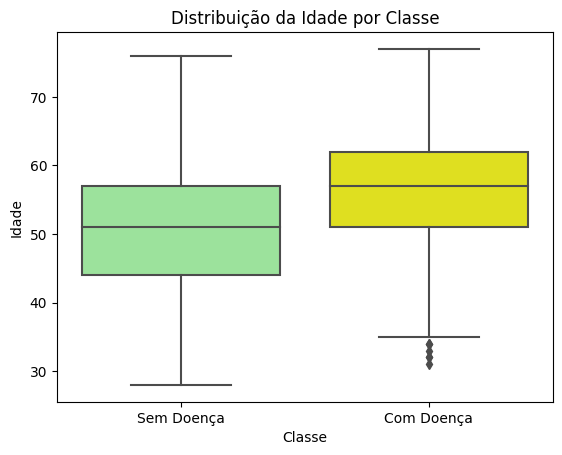

In [7]:
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribuição da Idade por Classe')
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()

- Os dados sugerem uma possível associação entre a idade e o risco de desenvolver doença cardíaca. Embora seja comum que o risco de doenças cardíacas aumente com a idade, a presença de outliers na classe com doença cardíaca sugere que essa relação pode não ser verdadeira em todos os casos. É importante considerar outros fatores e realizar análises mais detalhadas para compreender completamente essa associação.
---

#### 2.2. Há indícios de que existe uma correlação entre o sexo do indivíduo e o risco de doença cardíaca?

In [8]:
tabela_contagem = pd.crosstab(df['sex'], df['target'])
tabela_contagem.columns = ['Sem Doença', 'Com Doença']
tabela_contagem.index = ['Feminino', 'Masculino']
print("Contagem de pacientes com e sem doença cardíaca por sexo:")
print(tabela_contagem)

Contagem de pacientes com e sem doença cardíaca por sexo:
           Sem Doença  Com Doença
Feminino          211          70
Masculino         350         559


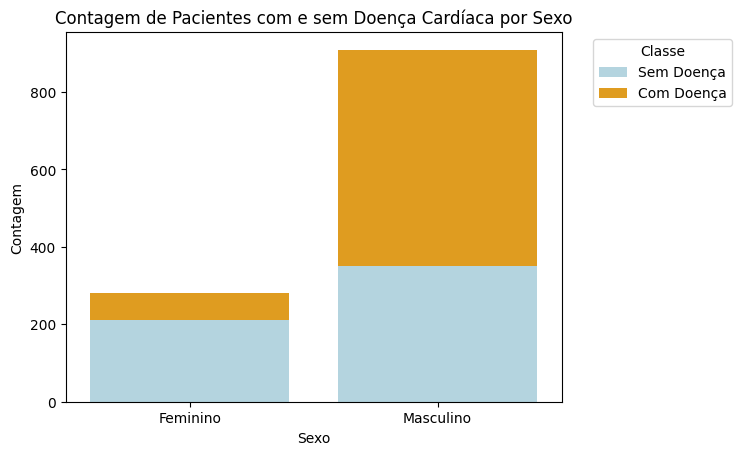

In [9]:
sns.barplot(data=tabela_contagem, x=tabela_contagem.index, y='Sem Doença', color='lightblue', label='Sem Doença')
sns.barplot(data=tabela_contagem, x=tabela_contagem.index, y='Com Doença', color='orange', bottom=tabela_contagem['Sem Doença'], label='Com Doença')
plt.title('Contagem de Pacientes com e sem Doença Cardíaca por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Com base na contagem de pacientes com e sem doença cardíaca por sexo, observa-se uma diferença significativa na prevalência da doença entre homens e mulheres. Os homens apresentam uma proporção maior de doença cardíaca (aproximadamente `62%` do total de homens) em comparação com as mulheres (aproximadamente `25%` do total de mulheres), sugerindo uma possível associação entre sexo e risco de doença cardíaca. Também é possível ver que `88%` dos casos de doença no conjunto de dados são do grupo masculino.
---

#### 2.3. Há indícios de que existe uma correlação entre o tipo de dor no peito e o risco de doença cardíaca?

In [10]:
contagem_dor_peito_por_classe = pd.crosstab(df['target'], df['chest pain type'])
contagem_dor_peito_por_classe.index = ['Sem Doença', 'Com Doença']
contagem_dor_peito_por_classe.columns = ['angina típica', 'angina atípica', 'dor não anginosa', 'assintomática']
print("Tabela de Contagem de Pacientes com e sem Doença Cardíaca por Tipo de Dor no Peito:")
print(contagem_dor_peito_por_classe)

Tabela de Contagem de Pacientes com e sem Doença Cardíaca por Tipo de Dor no Peito:
            angina típica  angina atípica  dor não anginosa  assintomática
Sem Doença             41             185               193            142
Com Doença             25              31                90            483


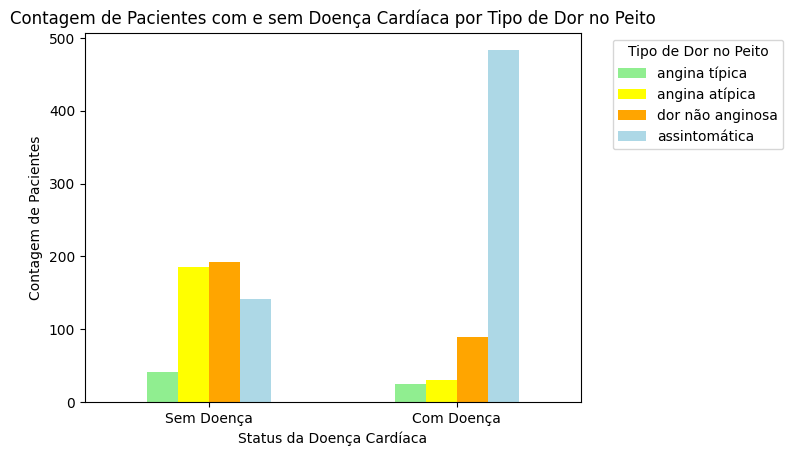

In [11]:
contagem_dor_peito_por_classe.plot(kind='bar')
plt.title('Contagem de Pacientes com e sem Doença Cardíaca por Tipo de Dor no Peito')
plt.xlabel('Status da Doença Cardíaca')
plt.ylabel('Contagem de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Dor no Peito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- É evidente que a maior parte dos casos de doença cardíaca (`77%`) não apresentavam sintomas de dores no peito (assintomática), com a dor não anginosa representando `14%` dos casos e as anginas representando menos de `5%` cada. Isso pode indicar que a presença da doença cardíaca costuma ocorrer quando o paciente não sente dor no peito, mas continua com uma obstrução parcial das artérias coronárias. Isso pode ocorrer assim como o mesmo pode apenas ter uma resistência maior a dores na região do peito. 
---

#### 2.4. Há indícios de que existe uma correlação entre a pressão arterial em repouso e o risco de doença cardíaca?

In [12]:
pressao_por_classe = df.groupby('target')['resting bp s'].describe()
print("\nTabela de Estatísticas de Pressão Arterial por Classe de Doença:")
pressao_por_classe


Tabela de Estatísticas de Pressão Arterial por Classe de Doença:


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,561.0,129.793226,16.490474,80.0,120.0,130.0,140.0,190.0
1,629.0,134.259141,19.670323,0.0,120.0,132.0,145.0,200.0


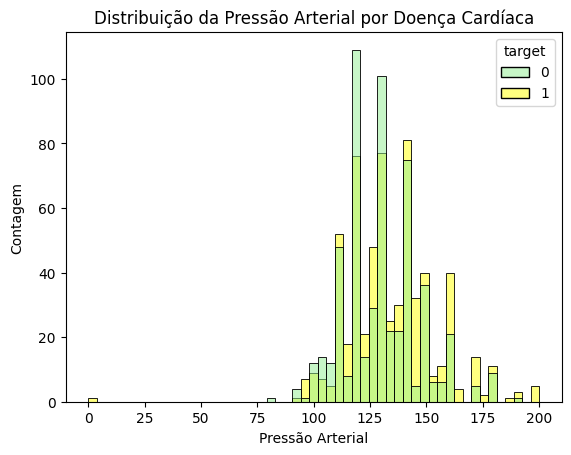

In [27]:
sns.histplot(data=df, x="resting bp s", hue='target')
plt.title('Distribuição da Pressão Arterial por Doença Cardíaca')
plt.ylabel('Contagem')
plt.xlabel('Pressão Arterial')
plt.show()

- Pode se observar um caso provavelmente de erro de coleta de dados no início do gráfico, pois existe uma linha com pressão arterial de `0` mmHg, com certeza indicando um valor impossível de pressão arterial.
- Os dados sugerem uma tendência de pressão arterial ligeiramente mais alta em pacientes com doença cardíaca em comparação com aqueles sem a doença. No entanto, a variabilidade nos dados e a presença de valores atípicos mostra que uma análise mais profunda se faz necessária.
---

#### 2.5. Há indícios de que existe uma correlação entre os níveis de colesterol e o risco de doença cardíaca?

In [28]:
colesterol_por_classe = df.groupby('target')['cholesterol'].describe()
print("\nTabela de Estatísticas de Níveis de Colesterol por Classe de Doença:")
colesterol_por_classe


Tabela de Estatísticas de Níveis de Colesterol por Classe de Doença:


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,561.0,231.657754,70.021658,0.0,201.0,232.0,268.0,564.0
1,629.0,191.372019,119.734612,0.0,126.0,226.0,274.0,603.0


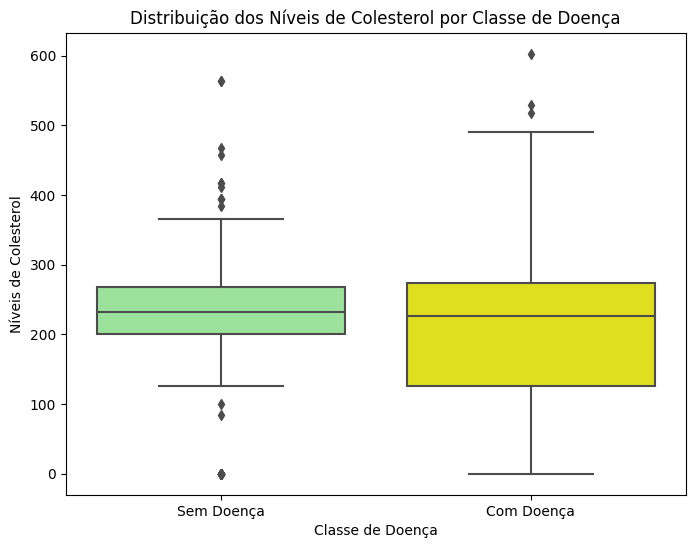

- Essa análise sugere uma possível associação entre os níveis de colesterol e o risco de doença cardíaca, com pacientes com doença cardíaca tendo, em média, níveis de colesterol mais baixos. No entanto, a presença de valores atípicos e a variabilidade nos dados destacam a necessidade de uma análise mais detalhada.
---

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='cholesterol', data=df)
plt.title('Distribuição dos Níveis de Colesterol por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Níveis de Colesterol')
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.show()

display(Markdown("- Essa análise sugere uma possível associação entre os níveis de colesterol e o risco de doença cardíaca, com pacientes com doença cardíaca tendo, em média, níveis de colesterol mais baixos. No entanto, a presença de valores atípicos e a variabilidade nos dados destacam a necessidade de uma análise mais detalhada.\n---"))


#### 2.6. Há indícios de que existe uma correlação entre os resultados do eletrocardiograma em repouso e o risco de doença cardíaca?

In [33]:
contagem_ecg_por_classe = pd.crosstab(df['resting ecg'], df['target'])
contagem_ecg_por_classe.columns = ['Sem Doença', 'Com Doença']
contagem_ecg_por_classe.index = ['Normal', 'Anormalidade ST-T', 'Hipertrofia Ventricular Esquerda']
contagem_ecg_por_classe

,Sem Doença,Com Doença
Normal,353,331
Anormalidade ST-T,62,119
Hipertrofia Ventricular Esquerda,146,179


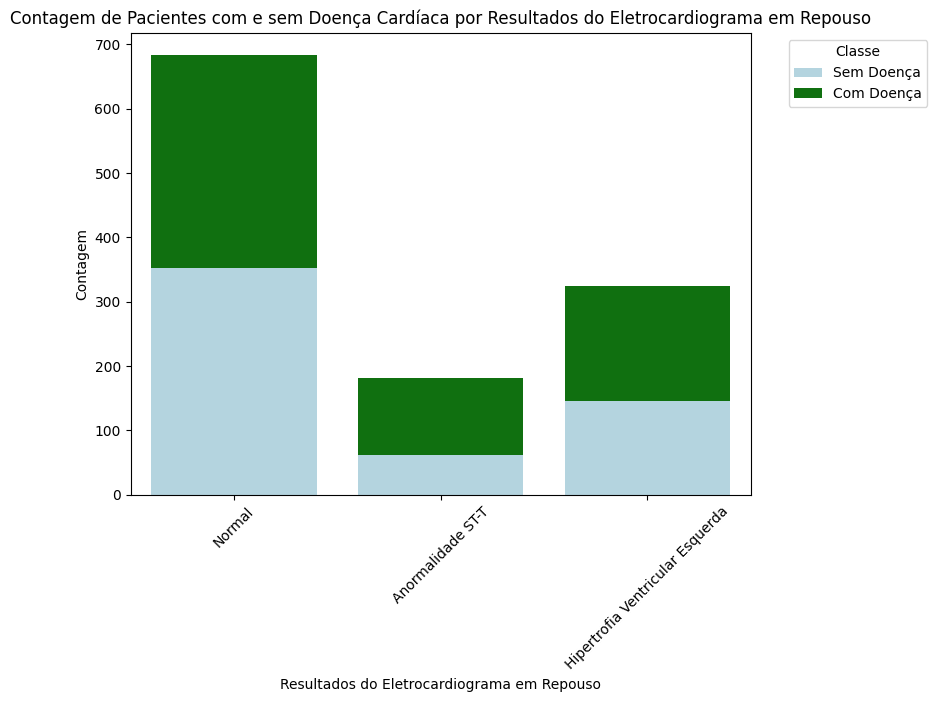

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=contagem_ecg_por_classe, x=contagem_ecg_por_classe.index, y='Sem Doença', color='lightblue', label='Sem Doença')
sns.barplot(data=contagem_ecg_por_classe, x=contagem_ecg_por_classe.index, y='Com Doença', color='green', bottom=contagem_ecg_por_classe['Sem Doença'], label='Com Doença')
plt.title('Contagem de Pacientes com e sem Doença Cardíaca por Resultados do Eletrocardiograma em Repouso')
plt.xlabel('Resultados do Eletrocardiograma em Repouso')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Pode ser perceber que para os resultados normais do eletrocardiograma, mesmo que indique normalidade, quase metade dos casos pertencem a pacientes com doença cardíaca, demonstrando que existem muitos casos em que o eletrocardiograma com resultado normal não indica se existe ou não uma doença cardíaca.
- Nos casos de anormalidade ST-T, podemos perceber uma tendência um pouco maior nos casos de doença, mostrando que pode haver uma relação entre esse tipo de resultado e a doença cardíaca, um possível indicador.
- Os casos de hipertrofia ventricular esquerda também não aparentam destacar uma diferença entre quem possui ou não doença cardíaca pois possui quase a mesma quantidade de casos para ambos, com um pouco mais de casos identificados com doença cardíaca.

---
#### 2.7. Há indícios de que existe uma correlação entre a frequência cardíaca máxima alcançada durante o exercício e o risco de doença cardíaca?

In [42]:
stats_max_heart_rate_por_classe = df.groupby('target')['max heart rate'].describe()
print("Tabela de Estatísticas da Frequência Cardíaca Máxima por Classe de Doença:")
stats_max_heart_rate_por_classe

Tabela de Estatísticas da Frequência Cardíaca Máxima por Classe de Doença:


,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,561.0,150.894831,22.704971,69.0,137.0,154.0,169.0,202.0
1,629.0,129.777424,23.718521,60.0,113.0,128.0,147.0,195.0


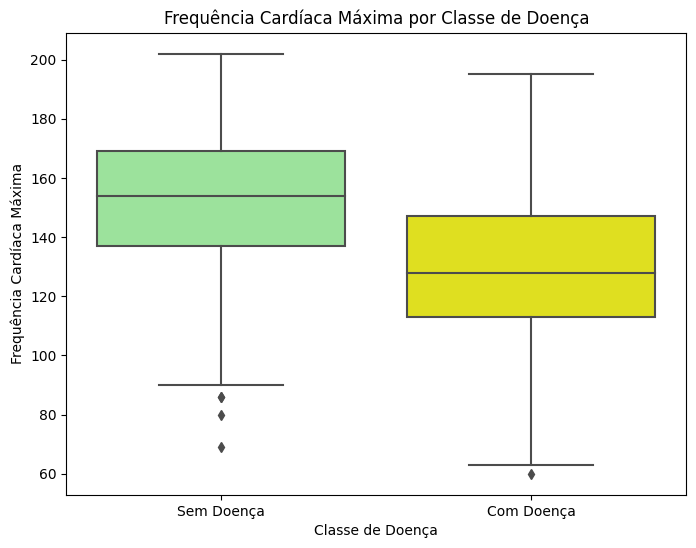

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='max heart rate')
plt.title('Frequência Cardíaca Máxima por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Frequência Cardíaca Máxima')
plt.xticks(ticks=[0, 1], labels=['Sem Doença', 'Com Doença'])
plt.show()

- De maneira geral, pode-se observar um máximo de frequência cardíaca menor para pacientes com a doença.

---
#### 2.8. Há indícios de que existe uma correlação entre a angina induzida por exercício e o risco de doença cardíaca?

In [38]:
contagem_angina_por_classe = pd.crosstab(df['exercise angina'], df['target'])
contagem_angina_por_classe.columns = ['Sem Doença', 'Com Doença']
contagem_angina_por_classe.index = ['Sem Angina', 'Com Angina']
print("\nTabela de Contagem de Pacientes com Angina por Classe de Doença:")
print(contagem_angina_por_classe)


Tabela de Contagem de Pacientes com Angina por Classe de Doença:
            Sem Doença  Com Doença
Sem Angina         483         246
Com Angina          78         383


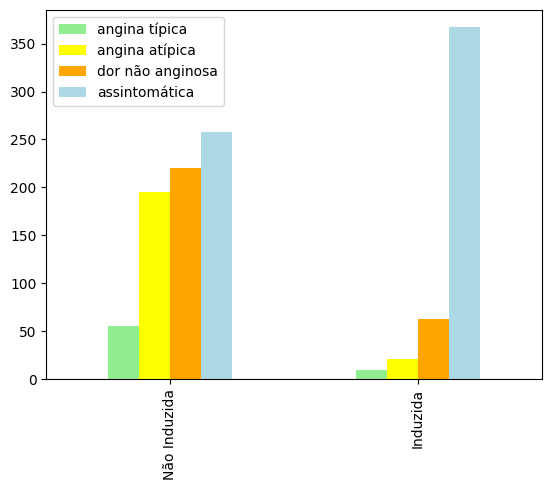

In [36]:
angina = pd.crosstab(df['exercise angina'], df['chest pain type'])
angina.index = ['Não Induzida', 'Induzida']
angina.columns = ['angina típica', 'angina atípica', 'dor não anginosa', 'assintomática']
angina.plot(kind='bar')
plt.show()

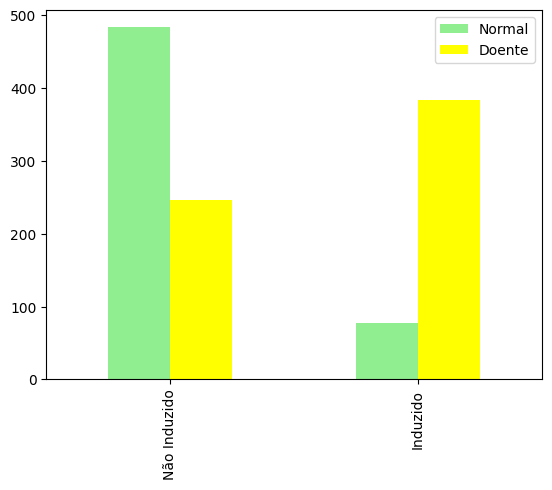

In [37]:
dor_por_exercicio = pd.crosstab(df['exercise angina'], df['target'])
dor_por_exercicio.index = ['Não Induzido', 'Induzido']
dor_por_exercicio.columns = ['Normal', 'Doente']
dor_por_exercicio.plot(kind='bar')
plt.show()

- As análises acima nos mostram que:
 
    - Os individuos saudáveis:
         - Não apresentaram, na maioria, dor anginosa induzida por exercício
         - Nos que apresentaram, na sua maioria, foi do tipo angina atípica e dor não anginosa
    - Os individuos com doença:
         - Apresentaram, na maioria, dor induzida, apesar de ser proximo dos que não foram induzidos
         - Apresentaram, quase que na totalidade, nenhuma dor (doença arterial coronariana assintomática).
---

#### 2.9. Há indícios de que existe uma correlação entre o valor antigo do pico e o risco de doença cardíaca?

In [46]:
stats_oldpeak_por_classe = df.groupby('target')['oldpeak'].describe()
print("Tabela de Estatísticas do Pico de Depressão do Segmento ST por Classe de Doença:")
print(stats_oldpeak_por_classe)

Tabela de Estatísticas do Pico de Depressão do Segmento ST por Classe de Doença:
        count      mean       std  min  25%  50%  75%  max
target                                                    
0       561.0  0.464706  0.733243 -1.1  0.0  0.0  0.8  4.2
1       629.0  1.331320  1.183346 -2.6  0.1  1.2  2.0  6.2


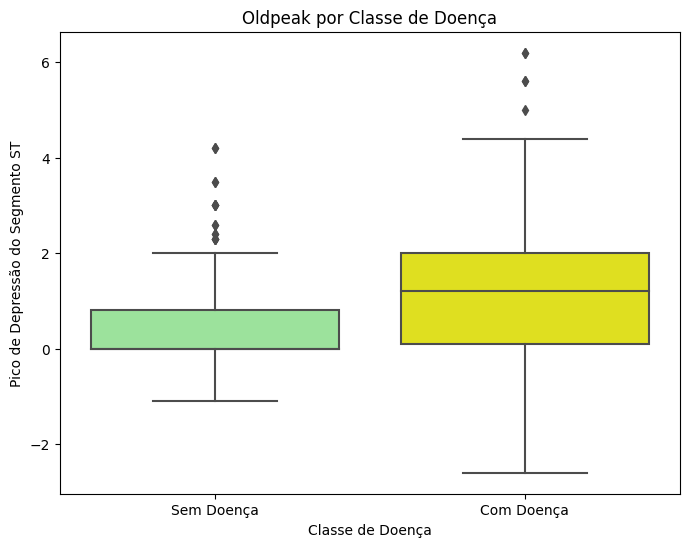

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='oldpeak')
plt.title('Oldpeak por Classe de Doença')
plt.xlabel('Classe de Doença')
plt.ylabel('Pico de Depressão do Segmento ST')
plt.xticks(ticks=[0, 1], labels=['Sem Doença', 'Com Doença'])
plt.show()

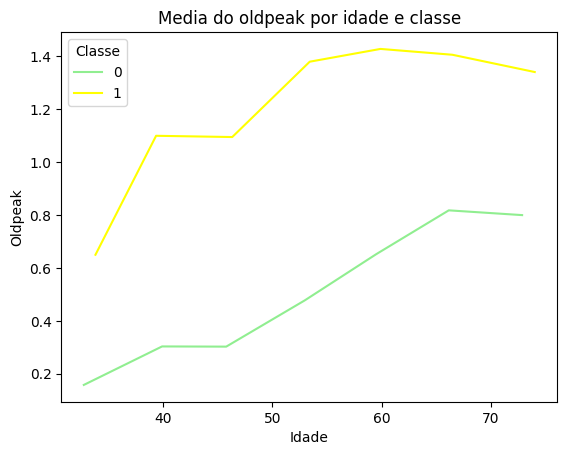

In [52]:
oldpeak = df[['age','target', 'oldpeak']].copy(deep=True)
oldpeak['age_bins'] = pd.cut(df['age'], bins=7)
to_plot = oldpeak.groupby(['target', 'age_bins']).agg({'age':'mean', 'oldpeak':'mean'})
plt.title('Media do oldpeak por idade e classe')
plt.xlabel('Idade')
plt.ylabel('Oldpeak')
sns.lineplot(
    data=to_plot,
    x='age',
    y='oldpeak',
    hue=to_plot.index.get_level_values('target')
)
plt.legend(title='Classe')
plt.show()

- O primeiro gráfico sugere que de forma geral, os doentes possuem uma variação maior entre os valores de oldpeak, mas também possuem uma média maior do pico de depressão do segmento ST que os que não possuem a doença cardíaca.
- Podemos observar que o deslocamento do segmento ST-T (oldpeak) vai aumentando à medida que a idade aumenta, enquanto que em questão de doença cardíaca, a média desse deslocamento é muito maior em quem tem do que em quem não tem.

---
#### 2.10. Há indícios de que existe uma correlação entre o tipo de inclinação do segmento ST em exercício e a ocorrência de doença cardíaca?

In [57]:
contagem_st_slope_por_classe = pd.crosstab(df['target'], df['ST slope'])
contagem_st_slope_por_classe = contagem_st_slope_por_classe.drop(0, axis=1)
contagem_st_slope_por_classe.index = ['Sem Doença', 'Com Doença']
contagem_st_slope_por_classe.columns = ['Ascendente', 'Plano', 'Descendente']
print("\nTabela de Contagem de Pacientes com e sem Doença Cardíaca por Inclinação do Segmento ST em Exercício:")
print(contagem_st_slope_por_classe)


Tabela de Contagem de Pacientes com e sem Doença Cardíaca por Inclinação do Segmento ST em Exercício:
            Ascendente  Plano  Descendente
Sem Doença         416    123           22
Com Doença         110    459           59


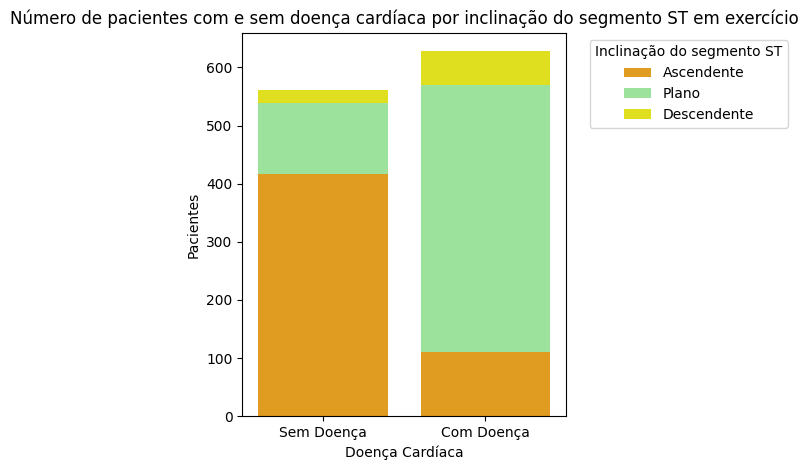

In [58]:
sns.barplot(data=contagem_st_slope_por_classe.reset_index(), x='index', y='Ascendente', color='orange', label='Ascendente')
sns.barplot(data=contagem_st_slope_por_classe.reset_index(), x='index', y='Plano', color='lightgreen', label='Plano', bottom=contagem_st_slope_por_classe['Ascendente'])
sns.barplot(data=contagem_st_slope_por_classe.reset_index(), x='index', y='Descendente', color='yellow', label='Descendente', bottom=contagem_st_slope_por_classe['Ascendente'] + contagem_st_slope_por_classe['Plano'])

plt.title('Número de pacientes com e sem doença cardíaca por inclinação do segmento ST em exercício')
plt.xlabel('Doença Cardíaca')
plt.ylabel('Pacientes')

plt.legend(title='Inclinação do segmento ST', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


- A inclinação plana do segmento ST é presente na grande maioria dos casos de doença cardíaca.
- Comparando os números, o gráfico sugere que inclinações planas e descendentes caracterizam mais casos com doença do que os casos sem doença.
- Os casos de pacientes sem a doença cardíaca apresentam na grande maioria inclinações ascendentes do segmento ST.

---


#### 2.11. Correlação entre as váriaveis.

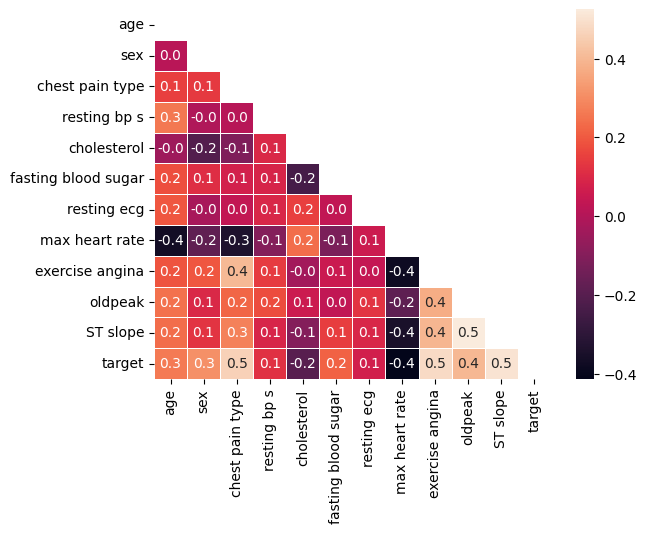

In [50]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plot = sns.heatmap(correlation, annot = True, fmt=".1f", mask=mask, linewidths=.6)

---
#### 2.12. Distribuição dos dados em relação a variável `target`.

In [59]:
qualitative_colors = sns.color_palette("tab10", n_colors=2)

/home/lucas/.cache/pypoetry/virtualenvs/src-qCtvi99s-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


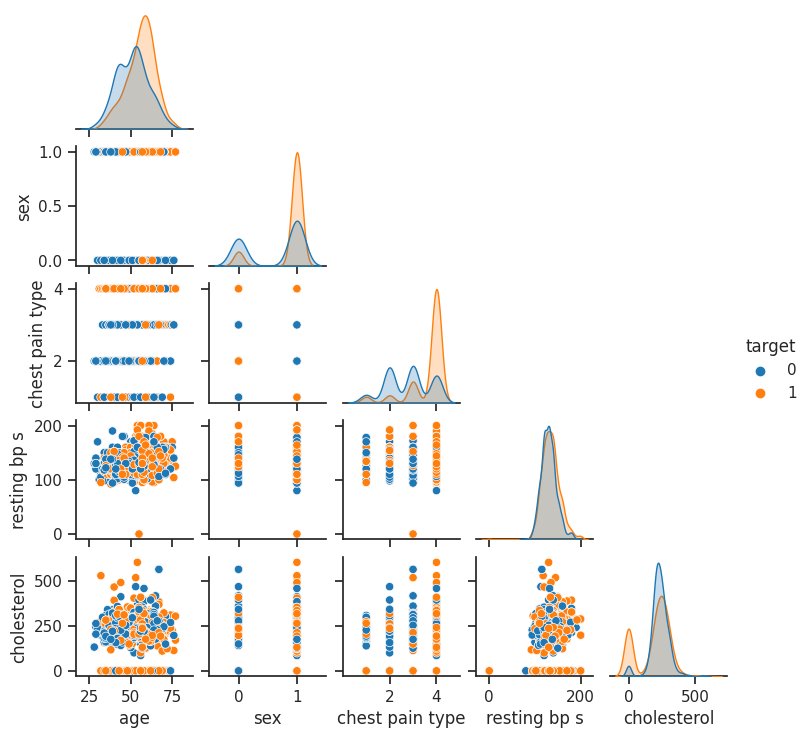

In [64]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(height=1.5, corner=True, data=df, vars=['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol'], hue='target', palette=qualitative_colors)

/home/lucas/.cache/pypoetry/virtualenvs/src-qCtvi99s-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


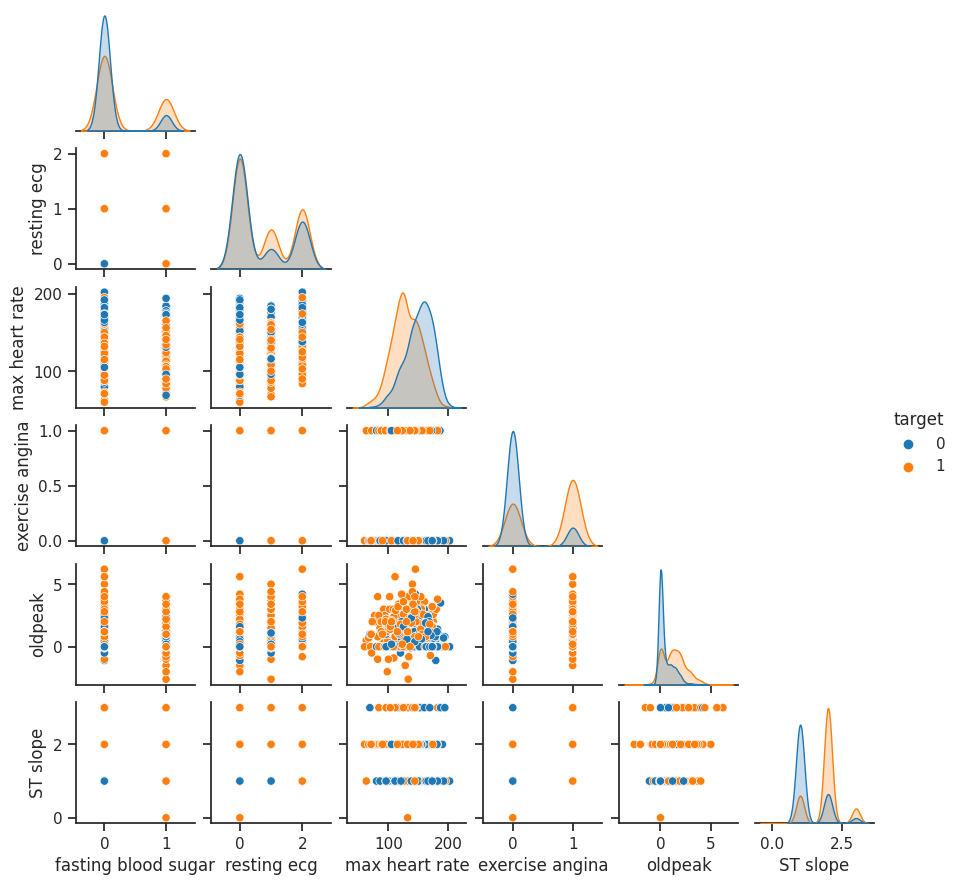

In [65]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(height=1.5, corner=True, data=df, vars=['fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'], hue='target', palette=qualitative_colors)

### 3. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

- Os dados sugerem uma possível associação entre a idade e o risco de desenvolver doença cardíaca. Embora seja comum que o risco de doenças cardíacas aumente com a idade, a presença de outliers na classe com doença cardíaca sugere que essa relação pode não ser verdadeira em todos os casos. É importante considerar outros fatores e realizar análises mais detalhadas para compreender completamente essa associação.

- Com base na contagem de pacientes com e sem doença cardíaca por sexo, observa-se uma diferença significativa na prevalência da doença entre homens e mulheres. Os homens apresentam uma proporção maior de doença cardíaca (aproximadamente `62%` do total de homens) em comparação com as mulheres (aproximadamente `25%` do total de mulheres), sugerindo uma possível associação entre sexo e risco de doença cardíaca. Também é possível ver que `88%` dos casos de doença no conjunto de dados são do grupo masculino.

- É evidente que a maior parte dos casos de doença cardíaca (`77%`) não apresentavam sintomas de dores no peito (assintomática), com a dor não anginosa representando `14%` dos casos e as anginas representando menos de `5%` cada. Isso pode indicar que a presença da doença cardíaca costuma ocorrer quando o paciente não sente dor no peito, mas continua com uma obstrução parcial das artérias coronárias. Isso pode ocorrer assim como o mesmo pode apenas ter uma resistência maior a dores na região do peito. 

- Pode se observar um caso provavelmente de erro de coleta de dados, pois existe uma linha com pressão arterial de `0` mmHg, com certeza indicando um valor impossível de pressão arterial.

- Pode ser perceber que para os resultados normais do eletrocardiograma, mesmo que indique normalidade, quase metade dos casos pertencem a pacientes com doença cardíaca, demonstrando que existem muitos casos em que o eletrocardiograma com resultado normal não indica se existe ou não uma doença cardíaca.

- Nos casos de anormalidade ST-T, podemos perceber uma tendência um pouco maior nos casos de doença, mostrando que pode haver uma relação entre esse tipo de resultado e a doença cardíaca, um possível indicador.

- De maneira geral, pode-se observar um máximo de frequência cardíaca menor para pacientes com a doença.

- Os individuos com doença apresentaram, na maioria dos casos, dor induzida por exercício, apesar de ser proximo dos que não foram induzidos. Além disso, apresentaram quase que na totalidade, nenhuma dor, seja por resistência ou por doença arterial coronariana assintomática.

- Podemos observar que o deslocamento do segmento ST-T (oldpeak) vai aumentando à medida que a idade aumenta, enquanto que em questão de doença cardíaca, a média desse deslocamento é muito maior em quem tem do que em quem não tem.

- A inclinação plana do segmento ST é presente na grande maioria dos casos de doença cardíaca.

E essas foram as principais conclusões a partir apenas dos dados obtidos, sem tratamento ou processamento, que tivemos.